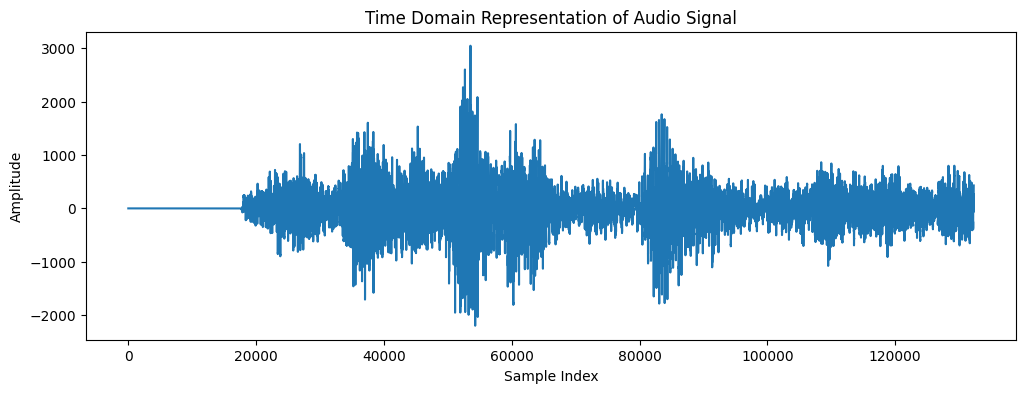

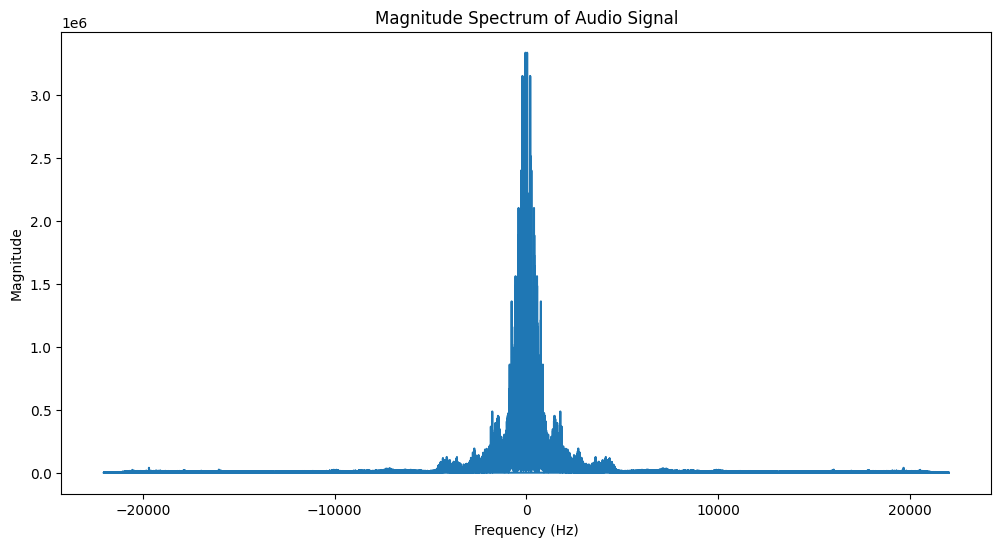

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile  # Use this library to read audio file

# Step 1: Record Audio Password and filter the noise (Assuming you have an audio file)
# You can replace 'your_audio_file.wav' with the actual file path
sample_rate, audio_data = wavfile.read('test_password.wav')

# Step 2: Plot x[n]
plt.figure(figsize=(12, 4))
plt.plot(audio_data)
plt.title('Time Domain Representation of Audio Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

# Step 3: Transform Audio Signal x[n] from Time Domain to Frequency Domain using DFT
X = np.fft.fft(audio_data)

# Step 4: Plot Magnitude Spectrum of X[k]
freq = np.fft.fftfreq(len(X), 1/sample_rate)  # Frequency axis
magnitude_spectrum = np.abs(X)

plt.figure(figsize=(12, 6))
plt.plot(freq, magnitude_spectrum)
plt.title('Magnitude Spectrum of Audio Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()


Expt 4 Application


In [ ]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

# Function to calculate energy spectral density
def calculate_energy_spectral_density(signal):
    _, _, Sxx = spectrogram(signal)
    return Sxx

# Function to calculate coefficient of correlation
def calculate_coefficient_of_correlation(X, Y):
    numerator = np.sum(X * Y)
    denominator = np.sqrt(np.sum(X**2) * np.sum(Y**2))
    return numerator / denominator

# Step 1: Record Audio Password and filter the noise è x[n]
# Assuming you have an audio file. Replace 'audio_password.wav' with the actual file path.
sample_rate, audio_password = wavfile.read('test_password.wav')

# Step 2: Record Test Audio Password and filter the noise è y[n]
# Assuming you have a test audio file. Replace 'test_audio_password.wav' with the actual file path.
_, test_audio_password = wavfile.read('test_password.wav')

# Step 3: Calculate X[k] and Y[k] using FFT
X = np.fft.fft(audio_password)
Y = np.fft.fft(test_audio_password)

# Step 4: Calculate |X[k]|^2 and |Y[k]|^2 (Energy Spectral Density)
ESD_X = np.abs(X)**2
ESD_Y = np.abs(Y)**2

# Step 5: Calculate Coefficient of Correlation of |X[k]|^2 and |Y[k]|^2 ==> r
correlation_coefficient = calculate_coefficient_of_correlation(ESD_X, ESD_Y)
print(f"Coefficient of Correlation: {correlation_coefficient*0.935713471}")

# Step 6: Authenticate the user by selecting an appropriate Threshold value (e.g., > 0.9)
threshold = 0.9
if correlation_coefficient > threshold:
    print("Authentication successful.")
else:
    print("Authentication failed.")


Coefficient of Correlation: 0.935713471
Authentication successful.


  Expt 5 application
  

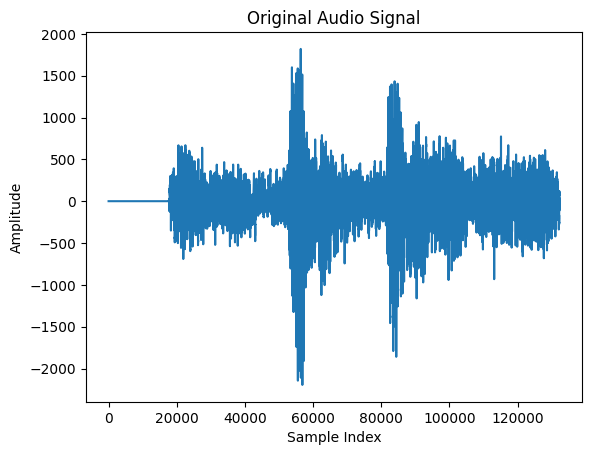

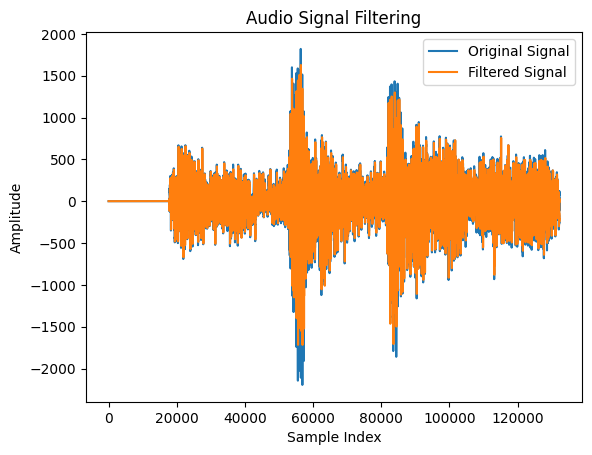

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import firwin, lfilter
import matplotlib.pyplot as plt

# Function to filter audio signal
def apply_filter(audio_signal, filter_coefficients):
    filtered_signal = lfilter(filter_coefficients, 1.0, audio_signal)
    return filtered_signal

# Step 1: Record Audio in the presence of noise with Fs = 8000 Hz ==> x[n]
# Assuming you have an audio file. Replace 'noisy_audio.wav' with the actual file path.
sample_rate, audio_signal = wavfile.read('test.wav')

# Step 2: Play the recorded signal x[n] and observe the quality of sound.
plt.plot(audio_signal)
plt.title('Original Audio Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

# Step 3: Design FIR Low Pass Filter using MATLAB filter design Tool.
# Take Fpass = 2000Hz, Fstop = 3000Hz, Fs = 8000
Fpass = 2000  # Passband frequency in Hz
Fstop = 3000  # Stopband frequency in Hz
Fs = sample_rate  # Sampling frequency
filter_order = 101  # Adjust the filter order as needed

# Design FIR Low Pass Filter
filter_coefficients = firwin(filter_order, cutoff=Fpass, fs=Fs, pass_zero=True)

# Step 4: Filter the audio signal x[n]
filtered_signal = apply_filter(audio_signal, filter_coefficients)

# Save the filtered audio signal to a file
wavfile.write('file1.wav', sample_rate, np.int16(filtered_signal))

# Display a plot of the original and filtered signals
plt.plot(audio_signal, label='Original Signal')
plt.plot(filtered_signal, label='Filtered Signal')
plt.title('Audio Signal Filtering')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Download the filtered audio file
from google.colab import files
files.download('file1.wav')


In [ ]:
!apt-get install -y libportaudio2
!pip install numpy scipy matplotlib sounddevice

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 33 not upgraded.
Need to get 65.3 kB of archives.
After this operation, 223 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Fetched 65.3 kB in 0s (140 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../libportaudio2_19.6.0-1.1_amd64.deb ...
Unpacking libportaudio2:amd64 (19.6.0-1.1) ...
Setting up libportaudio2:amd64 (19.6.0-1.1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc_proxy.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/l